# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

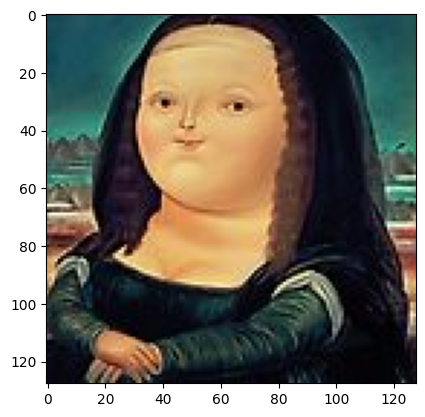

In [9]:
img = cv2.cvtColor(cv2.imread("../data/MonaLisaBotero.jpg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [10]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.average(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

78.57875569661458

In [11]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (int(vec[3]), int(vec[4]), int(vec[5])), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

    return out

In [12]:
h, w, c = img.shape

bounds = [
    [0, w],# x
    [0, h], # y
    [5, (w + h)//4], # radius
    [0, 255], # B
    [0, 255], # G
    [0, 255], # R
    [0.3, 1], # alpha
]

nIter, cR, popSize = 500, 0.75, 35

# Our Differential Evolution

In [13]:
from differential_evolution import differential_evolution

{'P': array([ 56.8970079 ,  33.31014944,  29.77291253, 245.38234895,
       170.79522383,  96.33217784,   0.79540968]), 'nIt': 800, 'fun': 61.551595052083336, 'nFev': 28035}


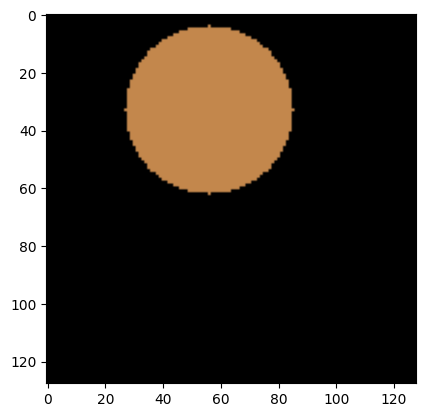

{'P': array([40.71176849, 27.10404774,  5.        ,  0.        , 59.11934069,
        0.19101642,  0.3       ]), 'nIt': 800, 'fun': 31.036092122395832, 'nFev': 28035}


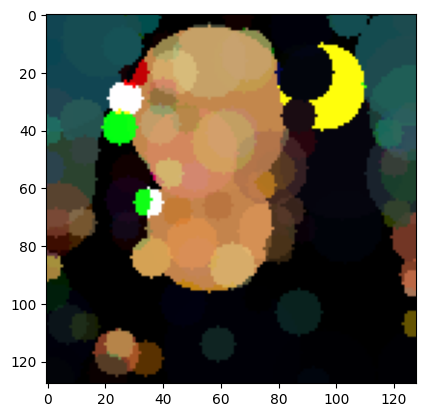

{'P': array([118.19792125,  93.08270797,   5.        ,   0.        ,
         0.        ,   0.51313786,   0.79875602]), 'nIt': 800, 'fun': 28.741109212239582, 'nFev': 28035}


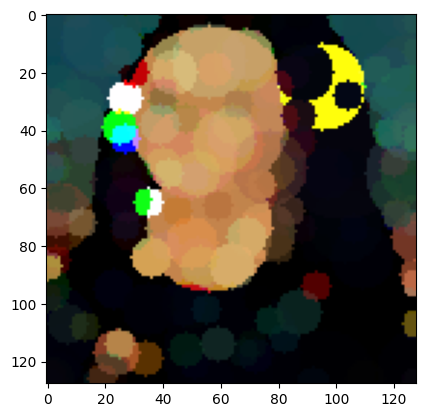

{'P': array([  0.        , 128.        ,   5.        ,   0.        ,
         0.        ,   0.        ,   0.93389648]), 'nIt': 800, 'fun': 27.916341145833332, 'nFev': 28035}


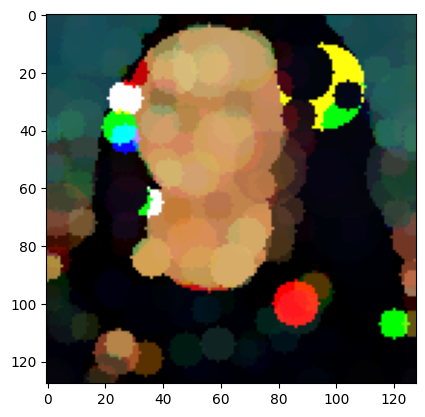

{'P': array([ 28.24168288, 128.        ,   5.        ,   0.        ,
         0.        ,   0.        ,   0.99127699]), 'nIt': 800, 'fun': 27.311930338541668, 'nFev': 28035}


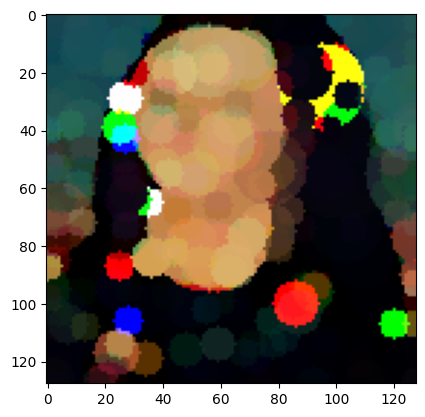

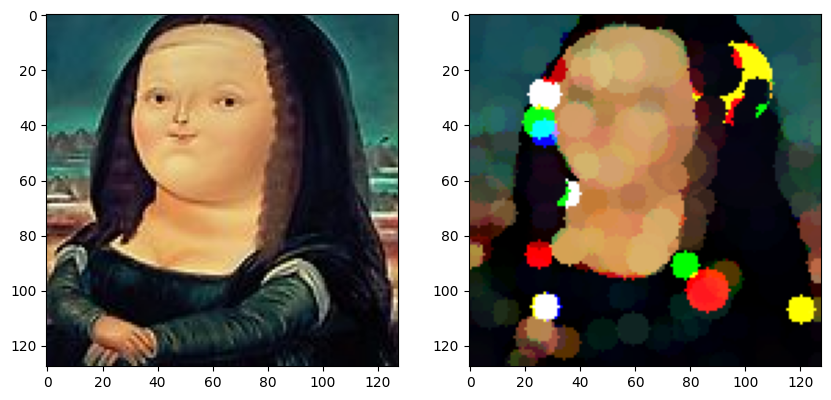

In [14]:
out = np.zeros_like(img)
data = np.zeros((nIter, len(bounds)))
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = 800) #The smaller cR is, it takes less risks
    if True: data[i] = r["P"]
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(r)
        draw_circle(r["P"], out, True)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(out) 

# Scipy Differential Evolution

In [15]:
from scipy.optimize import differential_evolution

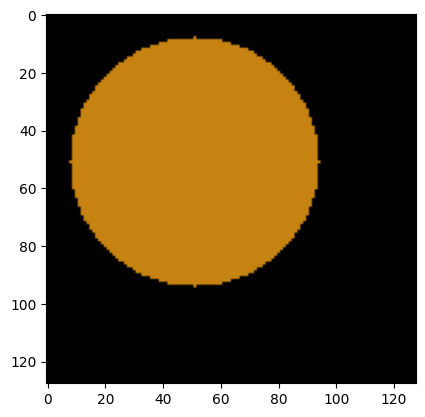

0      fun: 62.310262044270836
 message: 'Optimization terminated successfully.'
    nfev: 7113
     nit: 28
 success: True
       x: array([ 51.56101642,  51.4786061 ,  43.79688286, 230.36447137,
       152.54049049,  21.14360599,   0.86305044])


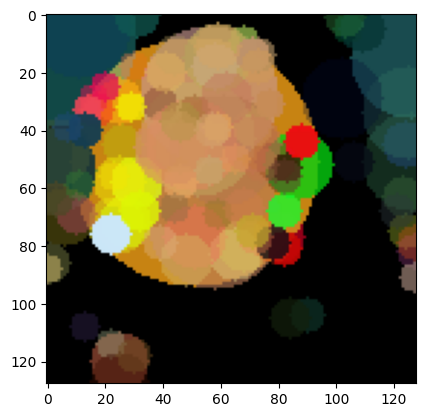

100      fun: 40.618855794270836
 message: 'Optimization terminated successfully.'
    nfev: 2458
     nit: 9
 success: True
       x: array([  7.13741753,  39.74609134,   5.23538588,  31.97340615,
        74.15750652, 124.56360288,   0.47785117])


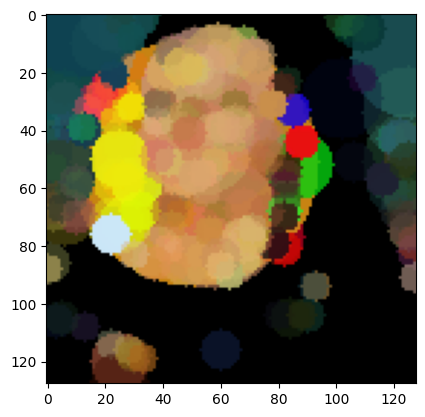

200      fun: 37.517435709635414
 message: 'Optimization terminated successfully.'
    nfev: 1968
     nit: 7
 success: True
       x: array([83.01916486, 63.80475367,  5.96829104, 49.16684267, 46.98417783,
       24.75971472,  0.48662846])


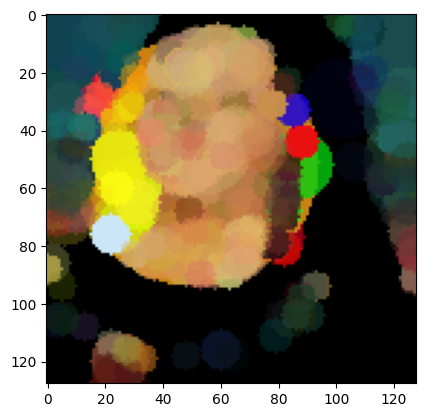

300      fun: 36.335978190104164
 message: 'Optimization terminated successfully.'
    nfev: 2213
     nit: 8
 success: True
       x: array([ 71.99590924,  75.75888236,   5.90235545, 235.74797322,
       174.43028236,  85.66555323,   0.35284216])


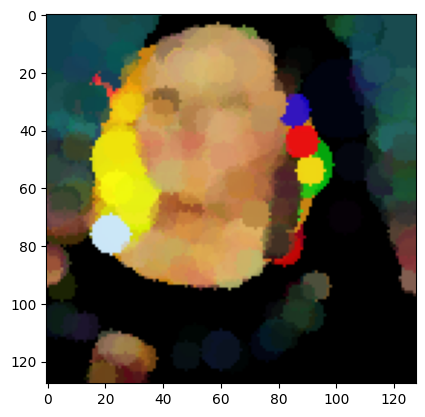

400      fun: 35.632405598958336
 message: 'Optimization terminated successfully.'
    nfev: 2458
     nit: 9
 success: True
       x: array([ 76.67656464,  27.05372292,   6.73037919, 199.89910813,
       153.71391516, 102.23785242,   0.34972296])


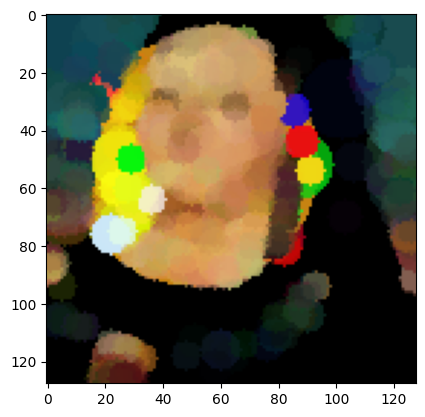

In [16]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize= popSize)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

### Make Animation

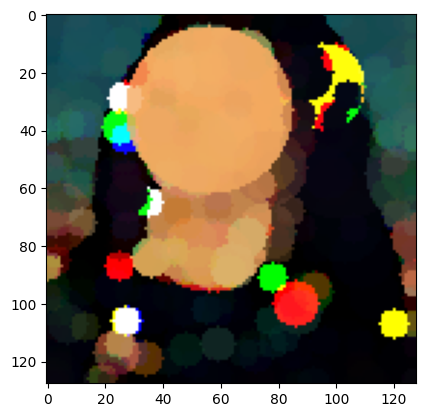

In [17]:
import matplotlib.animation as animation
from IPython import display
import time

fig = plt.figure()


imageToAnimate = np.zeros(img.shape, np.uint8)
plt.imshow(imageToAnimate)
def animate(frame_number):
    draw_circle(data[frame_number], imageToAnimate)
    plt.imshow(imageToAnimate)

if True:
    anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=20)

    f = str(int(time.time())) + ".gif"
    writervideo = animation.PillowWriter(fps=60)
    anim.save(f, writer=writervideo)